### Exponential smoothing

In [110]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [111]:
df = pd.read_csv('wine_Austral2.dat', sep='\t')
df.tail()

,fort,dry,sweet,red,rose,spark,total,year_,month_,date_
169,1568,3685,280,1728,35,1968,22784,1994,2,FEB 1994
170,1965,3754,187,2201,42,1720,23565,1994,3,MAR 1994
171,2659,3708,279,2455,48,1725,26323,1994,4,APR 1994
172,2354,3210,193,2204,44,1674,23779,1994,5,MAY 1994
173,2592,3517,227,2660,45,1693,27549,1994,6,JUN 1994


In [112]:
df.describe()

,fort,dry,sweet,red,rose,spark,total,year_,month_
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,3010.183908,3196.724138,246.362069,1591.270115,93.005747,2402.442529,25379.321839,1986.758621,6.396552
std,879.744321,682.859826,124.864046,582.974416,38.753929,1295.902839,5359.545072,4.202849,3.460460
min,1154.000000,1954.000000,85.000000,464.000000,30.000000,1170.000000,13652.000000,1980.000000,1.000000
25%,2371.750000,2726.500000,139.250000,1108.000000,66.000000,1605.000000,22094.250000,1983.000000,3.000000
50%,2898.000000,3073.000000,215.500000,1542.500000,87.000000,1866.500000,24669.000000,1987.000000,6.000000
75%,3565.000000,3629.500000,319.750000,2075.250000,114.250000,2513.500000,28408.250000,1990.000000,9.000000
max,5618.000000,5587.000000,662.000000,3330.000000,267.000000,7242.000000,40226.000000,1994.000000,12.000000


In [113]:
len(df)

174

0. Пропусков нет. Рассмотрим ряд под названием "Розовые вина"

<AxesSubplot:>

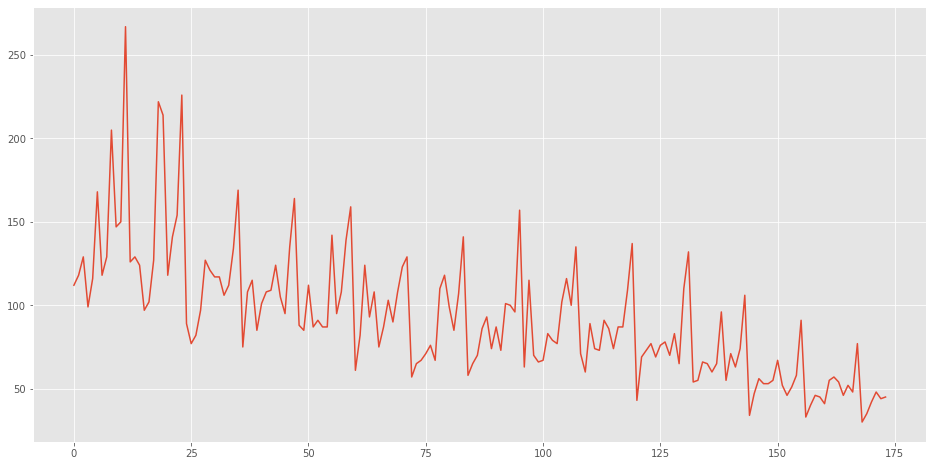

In [114]:
y = df["rose"]
plt.figure(figsize=(16,8))
y.plot()

Наблюдается отличие в модели поведения ряда на первых месяцах наблюдений

1. Есть ли у ряда тренд? Если есть, то какой аналитической функцией его можно аппроксимировать? </br>
Тренд есть, кубическая функция.

2. Есть ли у ряда сезонность? Аддитивная или мультипликативная или какая-то еще? </br>
Есть сезонность, мультипликативная.

3. Меняет ли ряд свой характер? Если да, то нужно отбросить ранние наблюдения. </br>
В целом можно сказать, что не меняет.

4. Есть ли у ряда выбросы? Выброс может изменить модель и испортить прогноз. Заменяем выброс на более разумное значение. </br>
Выбросов нет.

In [115]:
# Прогнозирование

from statsmodels.tsa.api import ExponentialSmoothing

In [116]:
fit1 = ExponentialSmoothing(np.asarray(y) ,seasonal_periods=12, trend='additive', seasonal='multiplicative', damped = True).fit()

C:\Users\79005\AppData\Local\Temp/ipykernel_17236/610769746.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit1 = ExponentialSmoothing(np.asarray(y) ,seasonal_periods=12, trend='additive', seasonal='multiplicative', damped = True).fit()
C:\Users\79005\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\79005\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


*seasonal_periods* - данные по месяцам, поэтому '12' </br>
*trend* - всегда 'additive' по рекомендации Hyndman'а </br>
(если тренд не аддитивный, то он растет по экспоненте) </br>
*seasonal* - сезонность мультипликативная </br>
*damped* - тренд затухающий </br>

In [117]:
print(len(y))
print(len(y)+8+1)

174
183


Вычисляем подгонку при помощи модели: построим прогноз на дальнейшие 8 месяцев

In [118]:
fitted_ = fit1.predict(0, 183)

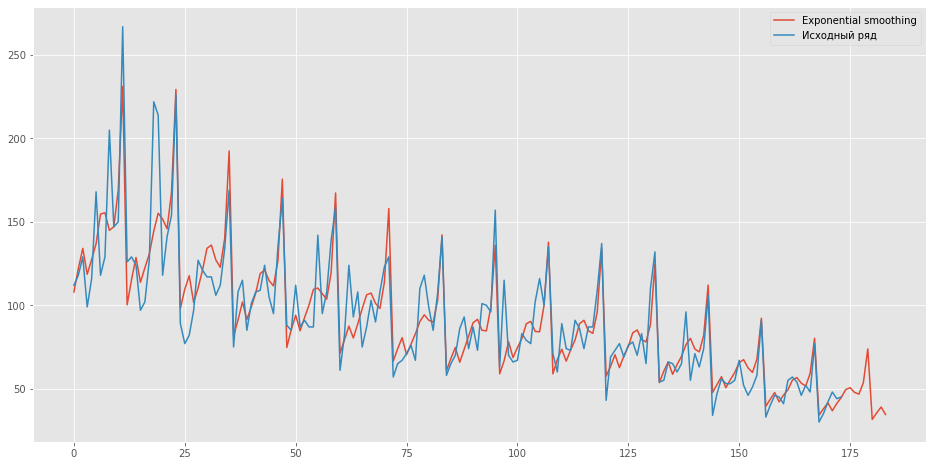

In [119]:
plt.figure(figsize=(16,8))
plt.plot(fitted_, label='Exponential smoothing')
plt.plot(np.asarray(y), label='Исходный ряд')
plt.legend(loc='best')
plt.show()

In [120]:
# Прогноз:

fitted_[175:183]

array([50.59947824, 47.78138957, 46.72151779, 53.64190942, 73.85762618,
       31.54326106, 35.45864748, 38.99767135])

Характер тренда не менялся, прогноз, скорее всего, не будет завышен.

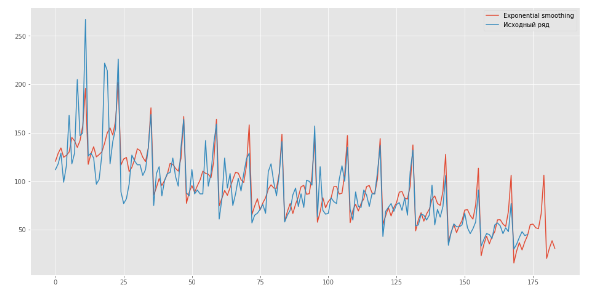